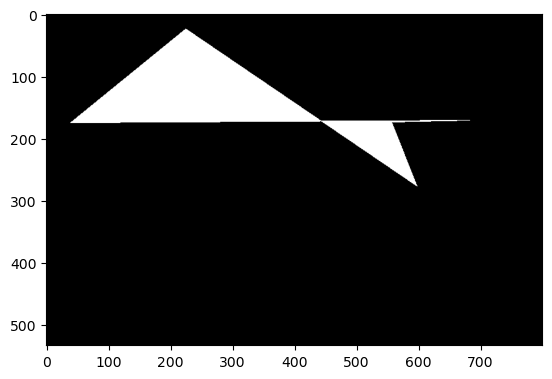

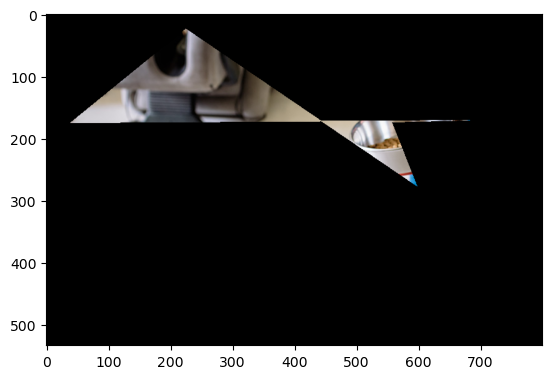

In [47]:
import cv2
import numpy as np
import random

def random_polygon(image, num_vertices):
    height, width = image.shape[:2]
    polygon_vertices = []

    for _ in range(num_vertices):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        polygon_vertices.append((x, y))

    return np.array([polygon_vertices], dtype=np.int32)

def apply_polygon_mask(image, polygon_vertices):
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, [polygon_vertices], (255, 255, 255))

    plt.imshow( cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.show()

    return cv2.bitwise_and(image, mask)



# Load an image
image_path = 'dog.jpg'
image = cv2.imread(image_path)

# Generate a random polygon with a specified number of vertices
num_vertices = 5
polygon_vertices = random_polygon(image, num_vertices)

# Apply the polygon mask to the image
masked_image = apply_polygon_mask(image, polygon_vertices)


plt.imshow( cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))



# Method 2

Here's a Python code using OpenCV to create a random polygon mask within the limits of a "main polygon" and apply it to an image. This code generates a random polygon with a specified number of vertices and area limit inside the given main polygon, and masks the given image with this polygon.

In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
def random_point_inside_polygon(polygon):
    x, y, width, height = cv2.boundingRect(polygon)
    xmin, ymin = x, y
    xmax, ymax = x + width, y + height
    while True:
        x = random.randint(xmin, xmax)
        y = random.randint(ymin, ymax)
        if cv2.pointPolygonTest(polygon, (x, y), False) >= 0:
            return (x, y)

def random_polygon_within_main_polygon(image, main_polygon, num_vertices):
    polygon_vertices = []

    for _ in range(num_vertices):
        point = random_point_inside_polygon(main_polygon)
        polygon_vertices.append(point)

    return np.array([polygon_vertices], dtype=np.int32)

def apply_polygon_mask(image, polygon_vertices):
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, [polygon_vertices], (255, 255, 255))

    return cv2.bitwise_and(image, mask)




(534, 800, 3)


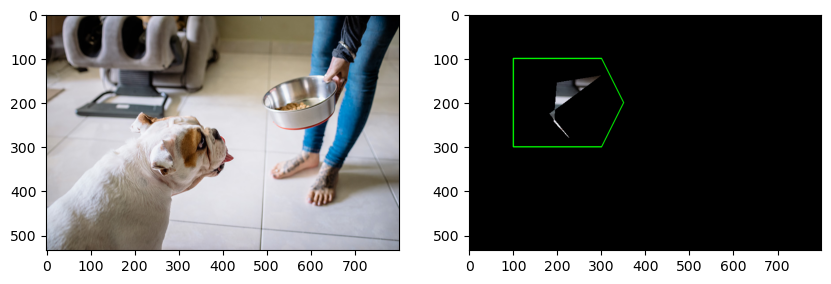

In [2]:

# Load an image
image_path = 'dog.jpg'
image = cv2.imread(image_path)

print(image.shape)


# Define the main polygon
main_polygon = np.array([[(100, 100), (300, 100), (350, 200), (300, 300), (100, 300)]], dtype=np.int32)

# Generate a random polygon with a specified number of vertices within the main polygon
num_vertices = 5
polygon_vertices = random_polygon_within_main_polygon(image, main_polygon, num_vertices)

# Apply the polygon mask to the image
masked_image = apply_polygon_mask(image, polygon_vertices)


# Draw the main polygon on the masked image
cv2.polylines(masked_image, [main_polygon], isClosed=True, color=(0, 255, 0), thickness=2)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow( cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))    

  